<h1 id="0">My First Notebook</h1>

Steps:

- [Data cleaning and analysis.](#1)
- [Prediction model building.](#2)


<h2 id="1">Data cleaning and analysis</h2>

[Go to top](#0)


Import libraries.


In [1]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib import style

# style.available: list of available style names.
style.use("ggplot")


Read file `train.csv`.


In [2]:
df_original = pd.read_csv("train.csv")

df_original.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Discard no relevant columns.


In [3]:
df_dropped_features = df_original.drop(
    ["PassengerId", "Name", "Embarked", "Parch", "Cabin"], axis=1
)

df_dropped_features.head()


,Survived,Pclass,Sex,Age,SibSp,Ticket,Fare
0,0,3,male,22.0,1,A/5 21171,7.2500
1,1,1,female,38.0,1,PC 17599,71.2833
2,1,3,female,26.0,0,STON/O2. 3101282,7.9250
3,1,1,female,35.0,1,113803,53.1000
4,0,3,male,35.0,0,373450,8.0500


Get unique values from a column.


In [4]:
print("Sex: ", df_dropped_features["Sex"].unique())


Sex:  ['male' 'female']


Convert categorical variable into dummy/indicator variables.


In [5]:
df_categorized = pd.get_dummies(df_dropped_features)

df_categorized.head()


,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,0,3,22.0,1,7.2500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,38.0,1,71.2833,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,7.9250,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,35.0,1,53.1000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,35.0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Generate descriptive statistics.


In [6]:
df_categorized.describe()


,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,32.204208,0.352413,0.647587,0.003367,0.003367,0.002245,...,0.001122,0.001122,0.001122,0.001122,0.002245,0.004489,0.001122,0.001122,0.001122,0.002245
std,0.486592,0.836071,14.526497,1.102743,49.693429,0.477990,0.477990,0.057961,0.057961,0.047351,...,0.033501,0.033501,0.033501,0.033501,0.047351,0.066890,0.033501,0.033501,0.033501,0.047351
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,31.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Remove passengers with missing ages.


In [7]:
df_cleaned = df_categorized.copy()

print("Passengers without age: ", df_cleaned.query("Age.isnull()").shape[0])

df_cleaned = df_categorized.dropna()
# df_cleaned["Age"] = df_categorized["Survived"]

print("Passengers without age: ", df_cleaned.query("Age.isnull()").shape[0])


Passengers without age:  177
Passengers without age:  0


Define a util function for plotting values with a bar chart.


In [8]:
def plot_with_bar(values=None, title=None, labels=None):
    if values == None:
        raise ValueError("Values cannot be empty.")

    if type(values) == list or type(values) == tuple:
        pass
    else:
        raise ValueError("Values must be a list or tuple.")

    series_index = [i for i in range(len(values))]
    plt.bar(series_index, values)
    plt.title(title)
    plt.xticks(series_index, labels)
    plt.show()


Representate the sex of the passangers.


Male:  453
Female:  261
Total:  714


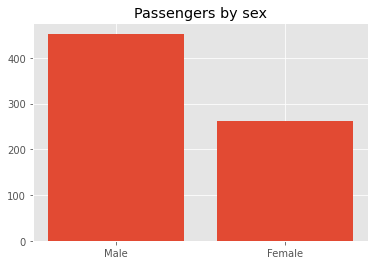

In [9]:
male = df_cleaned.query("Sex_male == 1")
female = df_cleaned.query("Sex_female == 1")

print("Male: ", male.shape[0])
print("Female: ", female.shape[0])
print("Total: ", df_cleaned.shape[0])

plot_with_bar(
    values=[male.shape[0], female.shape[0]],
    title="Passengers by sex",
    labels=["Male", "Female"],
)


<h2 id="2">Prediction model building</h2>

[Go to top](#0)


Separate the independent and dependent variables.


In [10]:
X = df_cleaned.drop("Survived", axis=1)
Y = df_cleaned["Survived"]

print(X.shape, Y.shape)


(714, 687) (714,)


Split arrays or matrices into random train and test subsets.


In [11]:
TRAIN_SIZE = 0.7
TEST_SIZE = 0.3

x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=TEST_SIZE, random_state=42
)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(499, 687) (499,)
(215, 687) (215,)


Get a random forest classifier model using the train dataset and validate with the test dataset.


In [12]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=25, max_depth=50)

rfc_model.fit(x_train, y_train)

print("Score with training set:", rfc_model.score(x_train, y_train))
print("Score with testing set:", rfc_model.score(x_test, y_test))


Score with training set: 0.9839679358717435
Score with testing set: 0.8093023255813954


[Go to top](#0)
